# Real-time carbon accounting and material transition for hydrogen systems

__author__ = "Marco De Sousa"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Marco De Sousa", "Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Marco De Sousa"
__email__ = "marcopdsousa@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a fixed demand of hydrogen on a daily scale while optimizing the production process by using forecasting techniques.

It is important to note that three different hydrogen pathways can be utilized each with their respective emissions.

Hypothesis: By using real-time carbon accounting, decisions and changes can be made in a more dynamic nature.

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
+ \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
- S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
\sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
\forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [1]:
import sys
sys.path.append('../src')

In [2]:
import pandas as pd
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource, Scope
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product
from energiapy.components.result import Result
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.model.constraints.integer_cuts import constraint_block_integer_cut, constraint_block_integer_cut_min
from scipy import stats

## Data Import

In [3]:
horizon = 1

The following data is needed for the model

- Daily demands of hydrogen.
- The capacity factor of renewable energy sources and traditional grid power.


**Declare temporal scale**

The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.



In [4]:
scales = TemporalScale(discretization_list=[1,24])

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [5]:
bigM = 10**8
smallM = 0.0001

Historical Data for Design - Hourly Electricity Pricing

In [6]:
elec_price_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/RT 31 March 2025.csv')
#elec_price_df = elec_price_df[elec_price_df['SettlementPoint'] == 'HB_HOUSTON']
elec_price_df = elec_price_df[['DAM Houston']].reset_index(drop = True)
elec_price_df = elec_price_df[:24]
elec_price_df

,DAM Houston
0,18.54
1,17.12
2,16.57
3,16.83
4,17.77
5,19.77
6,22.50
7,19.71
8,17.09
9,17.75


Hourly Natural Gas Prices

In [7]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
NG_price_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/RT 31 March 2025.csv')
# NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
NG_price_df = NG_price_df[['NG_Price']]
NG_price_df = NG_price_df[:24]
NG_price_df

,NG_Price
0,0.140173
1,0.140681
2,0.140173
3,0.140173
4,0.139665
5,0.138649
6,0.140681
7,0.140681
8,0.143220
9,0.143728


In [8]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
GWP_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/RT 31 March 2025.csv')
# NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
GWP_df = GWP_df[['GWP']]
GWP_df = GWP_df[:24].reset_index(drop = True)
GWP_df

,GWP
0,348.311221
1,334.372762
2,328.714281
3,320.358485
4,318.604407
5,331.342764
6,352.817494
7,366.807309
8,347.579346
9,300.723807


In [9]:
#Gives relevancy to price values again
elec_price = elec_price_df.max()[0]
NG_price = NG_price_df.max()[0]
GWP_value = GWP_df.max()[0]
#Demand_value = Demand_df.max()[0]

C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_14588\2629842020.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elec_price = elec_price_df.max()[0]
C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_14588\2629842020.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  NG_price = NG_price_df.max()[0]
C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_14588\2629842020.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  GWP_valu

## Declare Resources

In [10]:
# Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', price= 52.69, gwp=0, scope=Scope.TWO)

# Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power', price= 60.11, gwp=0, scope=Scope.TWO)

Power = Resource(name='Power', basis='MW',
                 label='Power generated')

# GridPower = Resource(name='GridPower', basis='MW',
#                      cons_max=bigM, label='Power bought', gwp=420.62, price = ecombined, varying = [VaryingResource.DETERMINISTIC_PRICE], scope = Scope.TWO)

# GridPower = Resource(name='GridPower', basis='MW',
#                      cons_max=bigM, label='Power bought', gwp= 353.83, price =elec_price ,varying = [VaryingResource.DETERMINISTIC_PRICE], scope = Scope.TWO)

GridPower = Resource(name='GridPower', basis='MW',
                     cons_max=bigM, label='Power bought', gwp= GWP_value, price =elec_price,varying = [VaryingResource.DETERMINISTIC_PRICE, VaryingResource.DETERMINISTIC_GWP], scope = Scope.TWO)

#The following are components of natural gas

CO2 = Resource(name='CO2', basis='kg/hr',
               label='Carbon dioxide', block='Resource')

CO2_Stack = Resource(name='CO2 to Stack', basis='kg/hr', sell=True,
               label='Carbon dioxide to Stack', block='Resource', gwp = 1, scope = Scope.ONE)

CO2_Air = Resource(name='CO2 from air', basis='kg/hr',
               label='Carbon dioxide from air', block='Resource', cons_max=bigM)

CO2_Vent = Resource(name='CO2 Vented from the process', basis='kg/hr',
               label='Carbon dioxide vented from the process', block='Resource', gwp = 1, sell=True, scope = Scope.ONE)

CO2cpt = Resource(name='CO2 Captured', basis='kg/hr', sell=True, label='Captured carbon dioxide', block='Resource')

#CO2_Blowdown= Resource(name='CO2 Blowdown', basis='kg/hr', sell=True, block='Resource', gwp = 1) # 2 ATR processes, imp, Stream X+20, 16+20 Declares CO2 going into the Boiler via Air stream 5 in ATR process

CH4 = Resource(name='CH4', basis='kg/hr',
               label='Methane', block='Resource')

CH4_Desorped = Resource(name='CH4_Desorped', basis='kg/hr',
               label='Methane', block='Resource') # True for ATR Occurs during ATR process

#Important: Natural gas consists over different components

NG = Resource(name='Natural Gas', basis='kg/hr',
                     cons_max=bigM, label='Natural Gas', gwp = 0.960979, price = NG_price/20, varying = [VaryingResource.DETERMINISTIC_PRICE]) #, varying = [VaryingResource.DETERMINISTIC_PRICE])

#NG_price_hourly
# Hydrogen is what I want to sell/satisfy a specific demand for

H2 = Resource(name='Hydrogen', basis='kg/hr', label='Hydrogen', block='Resource')

H2Pure = Resource(name='Pure Hydrogen', demand = True, basis='kg/hr', label='Pure Hydrogen', block='Resource')

# Water is required for the electrolysis process

H2O = Resource(name='H2O',
               basis='kg/hr', cons_max=bigM, label='Water', block='Resource')

#Industrial water price is 0.002 USD/kg of water
H2OFresh = Resource(name="H2O Fresh", cons_max=bigM, price = 0.002, basis='kg/hr', label='Fresh Water', block='Resource')

H2O_Air = Resource(name='H2O from air', cons_max=bigM,
               basis='kg/hr', label='Water from air', block='Resource')

H2O_Vent = Resource(name='H2O vented from the process',
               basis='kg/hr', sell=True, label='Water vented from the process', block='Resource')


H2O_Stack = Resource(name='H2O to Stack',
               basis='kg/hr', sell= True, label='Water to Stack', block='Resource')

'''Do we need h20 vent asu and just h20 vent?'''
H2O_Vent_ASU = Resource(name='H2O Vent from ASU',
               basis='kg/hr', sell= True, label='Water vented from ASU', block='Resource') # True for ATR - Stream 17

H2O_Blowdown = Resource(name='H2O in Blowdown',
               basis='kg/hr', sell= True, label='H2O present in air - Stream 5', block='Resource') # True for ATR - Stream 20

#Industrial water price is 0.002 USD/kg of water

# Air components

N2 = Resource(name='N2', basis='kg/hr',
               label='Nitrogen', block='Resource')

N2_SMR = Resource(name='N2 from SMR', basis='kg/hr',
               label='Nitrogen from SMR', block='Resource')

N2_WGS = Resource(name='N2 from WGS', basis='kg/hr',
               label='Nitrogen from WGS', block='Resource')

N2_FG = Resource(name='N2 from FG', basis='kg/hr',
               label='Nitrogen from FG', block='Resource')

N2_Air = Resource(name='N2 from Air', basis='kg/hr', cons_max= bigM,
               label='Nitrogen from Air', block='Resource')

N2_Vent = Resource(name='N2 vented from the process', basis='kg/hr', sell= True,
               label='Nitrogen vented from the process', block='Resource')

N2Prod = Resource(name='N2 in product stream', basis='kg/hr',
               label='Nitrogen in product stream', block='Resource')

N2_Stack = Resource(name='N2 to Stack', basis='kg/hr', sell= True,
               label='Nitrogen to stack', block='Resource')

N2_Desorped = Resource(name='N2 Desorped', basis='kg/hr',
               label='Nitrogen in CO2 desorption stream', block='Resource') # True for ATR
N2_Vented_Stack = Resource(name='N2 in Stack', basis='kg/hr',
               label='Nitrogen in Stack', block='Resource') # True for ATR
N2_Blowdown = Resource(name='N2 in Blowdown', basis='kg/hr',
               label='Nitrogen in Blowdown stream', block='Resource') # True for ATR

O2 = Resource(name='O2', basis='kg/hr',
               label='Oxygen', block='Resource')

O2_Air = Resource(name='O2 from air', basis='kg/hr',
               label='Oxygen from air', block='Resource', cons_max = bigM)

O2_Vent = Resource(name='O2 vented from the process', basis='kg/hr', sell=True,
               label='Oxygen vented from the process', block='Resource')

O2_Stack = Resource(name='O2 to Stack', basis='kg/hr', sell= True,
               label='Oxygen to Stack', block='Resource')

O2_Desorped = Resource(name='O2 Desorped', basis='kg/hr',
               label='Oxygen in CO2 desorption stream', block='Resource') # True for ATR

O2_ASU = Resource(name='O2 vented out of ASU', basis='kg/hr',
               label='O2 vented out of ASU', block='Resource') # True for ATR

O2_Blowdown = Resource(name='O2 in Blowdown', basis='kg/hr',
               label='O2 in Blowdown stream', block='Resource') # True for ATR


## Declare Processes

In [11]:
'''Purchasing electricity from a traditional power production system'''

Grid = Process(name='Grid', conversion={GridPower: -1, Power: 1}, prod_min=bigM, prod_max=bigM, label='Grid', basis='MW')

# PV = Process(name='PV', conversion={Solar: -1, Power: 1},
#              prod_max=150, prod_min=150,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')
# #PV - PPA was constructed as a 10 MWh system
# # capex=0.0001, fopex=0.0001, vopex=0.0001, gwp = 0.0001

# WF = Process(name='WF', conversion={Wind: -1, Power: 1},
#              prod_max=300, prod_min=300, label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')
#WF  - PPA was constructed as a 30 MWh system
SMR = Process(name='SMR', conversion={Power: -0.00065, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -19.2134, O2_Air: -5.88716, H2O_Air: -0.1582, CO2_Air: -0.01171, 
                                            H2Pure: 1, CO2_Stack: 9.3713,  H2O_Stack: 3.94959, N2_Stack: 19.29814, O2_Stack: 0.535434}, capex=0.2,
               vopex=0.78, fopex=0.06, prod_min=smallM, prod_max=bigM, label='SMR', basis='kg/hr')

SMRCCS = Process(name='SMRCCS', conversion={Power: -0.00139, N2_Air: -22.2315, O2_Air: -6.811924, H2O_Air: -0.183055, CO2_Air: -0.013551, CO2_Stack: -9.3713,
                                             H2O_Vent: 3.826767, CO2cpt: 8.903, CO2_Vent: 0.46856, H2O_Stack: 0.558114, N2_Stack: 22.32218, O2_Stack: 0.6203032, }, capex=0.45,
                vopex=1.01, fopex=0.1, prod_min=smallM, prod_max=bigM, label='SMRCCS', basis='kg/hr')

PEM = Process(name='PEM', conversion={Power: -0.064, H2OFresh: -9.5,
                                            H2Pure: 1}, capex=1.2,
               vopex=3.03, fopex=0.7, prod_min=smallM, prod_max=bigM, label='PEM', basis='kg/hr')
#Fact check = 6.5647:PEM, 35.06640796:AWE, 0.9375:SMR, 0.9375:ATR_CCS_R, 0.9375:ATR_CCS_R_OC - Conversion issue

ATR_CCS_R = Process(name='ATR_CCS_R', conversion= {Power: -0.00175403726, NG: -3.2080287, H2OFresh: -4.8123228, H2O_Air : -0.1041653, H2O_Vent_ASU : 0.0019387, H2O_Blowdown : 1.7351222, H2O_Vent : 0.5220523,
                                                   N2_Air: -12.653394, N2_Vent: 9.970844643, N2Prod: 0.002780318, N2_Vented_Stack: 2.182324573, N2_Desorped: 0.023329689, O2_Air: -3.87607534,
                                                   O2_ASU: 0.061984387, O2_Vent: 0.0647028, CO2_Air:-0.007711159, CO2_Vent: 0.457276602, CO2cpt: 7.733322317, H2Pure: 1}, capex=0.35,
               vopex=0.74, fopex=0.08, prod_min=smallM, prod_max=bigM, label='ATR_CCS_R', basis='kg/hr')

# ATR_CCS_OC = Process(name='ATR_CCS_OC', conversion={Power: -0.0059130434, NG: -3.584338787, CO2_Air: -0.010770164, CO2_Vent: 0.11601384, CO2cpt: 9.192057517, N2_Air: -17.67297545, N2_Vent: 16.7175342, N2_Blowdown: 0.000797082, N2_Desorped: 0.131330546, N2Prod: 0.002780318,
#                                                     H2O_Air: -0.145487576, H2OFresh: -5.377267146, H2O_Vent_ASU: 0.003250534, H2O_Blowdown: 3.598489736, O2_Air: -6.758549377, O2_Vent: 0.10392561, H2Pure: 1}, capex=0.45,
#                vopex=0.77, fopex=0.1, prod_min=smallM, prod_max=bigM, label='ATR_CCS_OC', basis='kg/hr')

ATR_CCS_R_OC = Process(name='ATR_CCS_R_OC', conversion={Power: -0.00203229813, NG: -3.208028688, CO2_Air: -0.007656042, CO2_Vent: 0.671400596, CO2cpt: 8.152141983, 
                                                        N2_Air: -12.56295099, N2_Vent: 11.88406435, N2_Blowdown: 0.008434949, N2_Desorped: 0.102417105, N2Prod: 0.002780318, 
                                                        H2OFresh: -4.812322829, H2O_Air: -0.103420802, H2O_Vent_ASU: 0.002310721, H2O_Blowdown: 0.004504513, O2_Air: -4.804359335, 
                                                        O2_Vent: 0.073878039, H2Pure: 1}, capex=0.35,
               vopex=0.75, fopex=0.1, prod_min=smallM, prod_max=bigM, label='ATR_CCS_R_OC', basis='kg/hr')

AWE = Process(name='AWE', conversion={Power: -0.05, H2OFresh: -9.4635,
                                            H2Pure: 1}, capex=0.810127,vopex=4.050633, fopex=0.202532, prod_min=smallM, prod_max=bigM, label='AWE', basis='kg/hr')

# Battery process
# Add into resources
#   LiI_Power = Resource(name='LiI_Power', basis='MW', label='Power in LiI', store_max=10000, store_min=smallM)
                
# LiI = Process(name='LiI', conversion={Power: -1, LiI_Power: 1}, capex= 1,
#                  fopex=2, vopex=2,
#                 store_max=10000, store_min=smallM, cap_max=bigM, cap_min=smallM, label='Lithium-ion battery', basis='MW', block='energy_storage')

# LiI_discharge = Process(name='LiI', conversion={Power: 1, LiI_Power: -1}, capex=0.1,
#                             fopex=0.01, vopex=0, cap_max=bigM, cap_min=smallM,  label='Lithium-ion battery (d)', basis='MW')

#Harsh formulation
# Electrochemical Storage

LiI = Process(name='LiI', storage=Power, vopex=0.5, capex=0.000000001, fopex=0, prod_min=0,  prod_max=200,
              storage_loss=0.11,  label='Lithium-ion battery', basis='MW', store_max=500, storage_capex=253.70)
#1390000, , storage_capex=1250  253.70
# PbAcid = Process(name='PbAcid', storage=Power, vopex=0.5, capex=0.000000001, fopex=0, prod_min=0,  prod_max=200,
#               storage_loss=0.20,  label='Lead Acid battery', basis='MW', store_max=500, storage_capex=200000)

# NaS = Process(name='NaS', storage=Power, vopex=0.5, capex=0.000000001, fopex=0, prod_min=0,  prod_max=200,
#               storage_loss=0.25,  label='Sodium sulfur battery', basis='MW', store_max=500, storage_capex=300000)

# Mechanical Storage

# PSH = Process(name='PSH', storage=Power, vopex=0.5, capex=0.000000001, fopex=0, prod_min=0,  prod_max=200,
#               storage_loss=0.2,  label='Pumped stored hydro', basis='MW', store_max=500)
#, storage_capex=3717000

# CAES = Process(name='CAES', storage=Power, vopex=0.5, capex=0.000000001, fopex=0, cap_min=0,  cap_max=200,
#               storage_loss=0.11,  label='Compressed air energy storage', basis='MW', store_max=500, storage_capex=1250)

# FWES = Process(name='NaS', storage=Power, vopex=0.5, capex=0.000000001, fopex=0, cap_min=0,  cap_max=200,
#               storage_loss=0.11,  label='Sodium sulfur battery', basis='MW', store_max=500, storage_capex=1250)




## Declare Location

In [12]:
1390000/5478.75

253.70750627424138

In [13]:
31000/5478.75


5.658224960073009

In [14]:
process_set = {Grid, SMR, PEM,SMRCCS, ATR_CCS_R, ATR_CCS_R_OC, AWE, LiI}#, SMRCCS, PEM} #Grid,  ATR_CCS_OC,
#process_set = {PV, WF, PEM, AWE}#, SMRCCS, PEM} #Grid,  ATR_CCS_OC,

# process_set = {Grid, PV, WF, SMR, AWE}#, SMRCCS, PEM} #Grid,

# process_set = {Grid, PV, WF, SMR, SMRCCS, ATR_CCS_OC, ATR_CCS_R, ATR_CCS_R_OC}#, SMRCCS, PEM} #Grid,

In [15]:
houston = Location(name='HO', processes=process_set, price_factor={GridPower: elec_price_df, NG: NG_price_df}, gwp_factor={GridPower: GWP_df},
                   scales=scales, label='Houston', expenditure_scale_level=0, demand_scale_level=0, price_scale_level=1,  gwp_scale_level = 1)

#, NG: NG_price_hourly capacity_scale_level=0,

## Declare Scenario

In [16]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=0, demand_scale_level=0, 
                    purchase_scale_level = 1, scheduling_scale_level=1, network_scale_level=0, gwp_scale_level = 1,
                    label='full_case', demand={houston: {H2Pure:200000}})


#200000  capacity_scale_level=0,

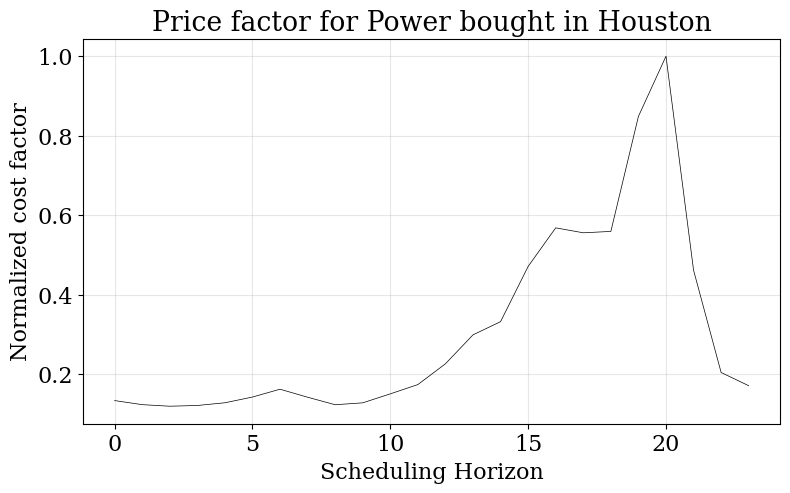

In [17]:

plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=GridPower, fig_size=(9, 5), color='black')


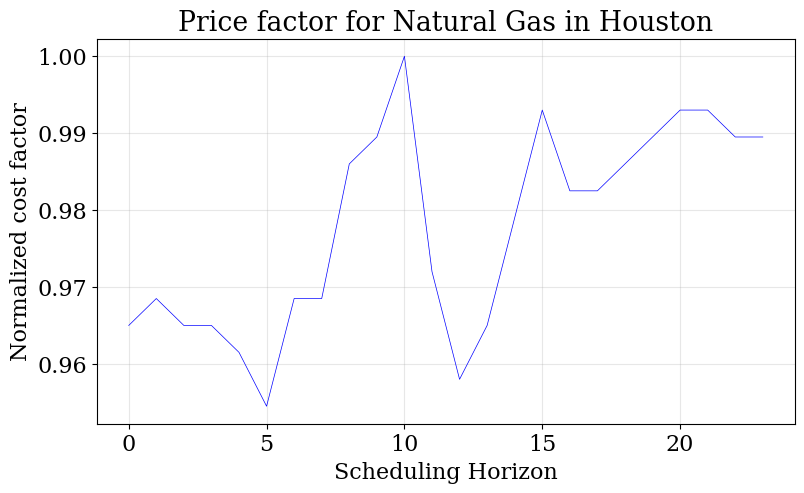

In [18]:
plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=NG, fig_size=(9, 5), color='blue')

In [19]:
#Stop here and revise all your entries

## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

In [20]:
milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.NETWORK, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'geq')

constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost


In [21]:
milp_cost.constraint_production_facility.pprint()

constraint_production_facility : production facility sizing and location
    Size=9, Index=locations*processes*{0}, Active=True
    Key                        : Lower : Body                                                        : Upper : Active
        ('HO', 'ATR_CCS_R', 0) :  -Inf :       Cap_P[HO,ATR_CCS_R,0] - 100000000*X_P[HO,ATR_CCS_R,0] :   0.0 :   True
     ('HO', 'ATR_CCS_R_OC', 0) :  -Inf : Cap_P[HO,ATR_CCS_R_OC,0] - 100000000*X_P[HO,ATR_CCS_R_OC,0] :   0.0 :   True
              ('HO', 'AWE', 0) :  -Inf :                   Cap_P[HO,AWE,0] - 100000000*X_P[HO,AWE,0] :   0.0 :   True
             ('HO', 'Grid', 0) :  -Inf :                 Cap_P[HO,Grid,0] - 100000000*X_P[HO,Grid,0] :   0.0 :   True
              ('HO', 'LiI', 0) :  -Inf :                         Cap_P[HO,LiI,0] - 200*X_P[HO,LiI,0] :   0.0 :   True
    ('HO', 'LiI_discharge', 0) :  -Inf :     Cap_P[HO,LiI_discharge,0] - 200*X_P[HO,LiI_discharge,0] :   0.0 :   True
              ('HO', 'PEM', 0) :  -Inf :      

In [22]:
milp_cost.constraint_storage_capex.pprint()

constraint_storage_capex : capex for storage
    Size=1, Index=locations*resources_store*{0}, Active=True
    Key                           : Lower : Body                                                                      : Upper : Active
    ('HO', 'LiI_Power_stored', 0) :   0.0 : Capex_storage[HO,LiI_Power_stored,0] - 253.7*Cap_S[HO,LiI_Power_stored,0] :   0.0 :   True


In [23]:
from pyomo.environ import Var, Binary, ConstraintList


milp_cost.cons2 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMR', i[0]])
        # milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMR', i[0]])

milp_cost.cons3 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons3.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*milp_cost.Cap_P['HO','SMR', i[0]])

# #ramping_limitz = 2000

milp_cost.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons4.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] - milp_cost.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_cost.Cap_P['HO','ATR_CCS_R', i[0]])

milp_cost.cons5 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons5.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] - milp_cost.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_cost.Cap_P['HO','ATR_CCS_R', i[0]])

# milp_cost.cons6 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_cost.cons6.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] - milp_cost.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])

# milp_cost.cons7 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_cost.cons7.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] - milp_cost.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])        

milp_cost.cons8 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons8.add(expr = milp_cost.P['HO', 'ATR_CCS_R_OC', *i] - milp_cost.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_cost.Cap_P['HO','ATR_CCS_R_OC', i[0]])

milp_cost.cons9 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons9.add(expr = milp_cost.P['HO', 'ATR_CCS_R_OC', *i] - milp_cost.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_cost.Cap_P['HO','ATR_CCS_R_OC', i[0]])  

    # Minimum production rate
    # milp_cost.cons1 = ConstraintList()
    # for i in scales.scale_iter(1):
    #  milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

    # Add binary variables for on/off control
# milp_cost.on_smr = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for SMR system
# milp_cost.on_atr_ccs_r = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R system
# milp_cost.on_atr_ccs_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_OC system
# milp_cost.on_atr_ccs_r_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R_OC system

milp_cost.cons10 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_cost.cons10.add(expr = milp_cost.P['HO', 'SMR', *i] >= 0.3*milp_cost.Cap_P['HO','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]

milp_cost.cons11 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_cost.cons11.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] >= 0.2*milp_cost.Cap_P['HO','ATR_CCS_R', i[0]]) #20% of max production rate
    
# milp_cost.cons12 = ConstraintList()
# for i in scales.scale_iter(2):
#     #if i != (0,0):
#     milp_cost.cons12.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] >= 0.2*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]]) #20% of max production rate

milp_cost.cons13 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_cost.cons13.add(expr = milp_cost.P['HO', 'ATR_CCS_R_OC', *i] >= 0.2*milp_cost.Cap_P['HO','ATR_CCS_R_OC', i[0]]) #20% of max production rate

    # For SMR
milp_cost.cons14 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_smr == 0)
    milp_cost.cons14.add(expr = milp_cost.P['HO', 'SMR', *i] <=milp_cost.Cap_P['HO','SMR', i[0]])

# For ATR_CCS_R
milp_cost.cons15 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r == 0)
    milp_cost.cons15.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] <= milp_cost.Cap_P['HO','ATR_CCS_R', i[0]])

# # For ATR_CCS_OC
# milp_cost.cons16 = ConstraintList()
# for i in scales.scale_iter(2):
#     #if i != (0, 0):
#     # Force production to zero if the system is off (on_atr_ccs_oc == 0)
#     milp_cost.cons16.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] <= milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])

# For ATR_CCS_R_OC
milp_cost.cons17 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r_oc == 0)
    milp_cost.cons17.add(expr = milp_cost.P['HO', 'ATR_CCS_R_OC', *i] <= milp_cost.Cap_P['HO','ATR_CCS_R_OC', i[0]])


In [24]:
results_cost = solve(scenario=scenario, instance=milp_cost,
                     solver='gurobi', name=f"res_cost", print_solversteps=True, saveformat = '.pkl')


Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Non-default parameters:
QCPDual  1

Optimize a model with 2888 rows, 14645 columns and 7645 nonzeros
Model fingerprint: 0xf67c4978
Variable types: 14635 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e-09, 1e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 1e+08]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 2526 rows and 14446 columns
Presolve time: 0.00s
Presolved: 362 rows, 199 columns, 1049 nonzeros
Variable types: 195 continuous, 4 integer (4 binary)
Found heuristic solution: objective 175164.16668

Root relaxation

In [25]:
x = results_cost.output['P']

In [26]:
results_cost.output['P']

{('HO', 'ATR_CCS_R', 0, 0): 0.0,
 ('HO', 'ATR_CCS_R', 0, 1): 0.0,
 ('HO', 'ATR_CCS_R', 0, 2): 0.0,
 ('HO', 'ATR_CCS_R', 0, 3): 0.0,
 ('HO', 'ATR_CCS_R', 0, 4): 0.0,
 ('HO', 'ATR_CCS_R', 0, 5): 0.0,
 ('HO', 'ATR_CCS_R', 0, 6): 0.0,
 ('HO', 'ATR_CCS_R', 0, 7): 0.0,
 ('HO', 'ATR_CCS_R', 0, 8): 0.0,
 ('HO', 'ATR_CCS_R', 0, 9): 0.0,
 ('HO', 'ATR_CCS_R', 0, 10): 0.0,
 ('HO', 'ATR_CCS_R', 0, 11): 0.0,
 ('HO', 'ATR_CCS_R', 0, 12): 0.0,
 ('HO', 'ATR_CCS_R', 0, 13): 0.0,
 ('HO', 'ATR_CCS_R', 0, 14): 0.0,
 ('HO', 'ATR_CCS_R', 0, 15): 0.0,
 ('HO', 'ATR_CCS_R', 0, 16): 0.0,
 ('HO', 'ATR_CCS_R', 0, 17): 0.0,
 ('HO', 'ATR_CCS_R', 0, 18): 0.0,
 ('HO', 'ATR_CCS_R', 0, 19): 0.0,
 ('HO', 'ATR_CCS_R', 0, 20): 0.0,
 ('HO', 'ATR_CCS_R', 0, 21): 0.0,
 ('HO', 'ATR_CCS_R', 0, 22): 0.0,
 ('HO', 'ATR_CCS_R', 0, 23): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 0): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 1): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 2): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 3): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 4): 0.0,
 ('HO', 'ATR_C

In [27]:
results_cost.output['Cap_P']

{('HO', 'ATR_CCS_R', 0): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0): 0.0,
 ('HO', 'AWE', 0): 0.0,
 ('HO', 'Grid', 0): 100000000.0,
 ('HO', 'LiI', 0): 0.0,
 ('HO', 'LiI_discharge', 0): 0.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'SMR', 0): 9433.962264150943,
 ('HO', 'SMRCCS', 0): 0.0}

In [28]:
results_cost.output['Cap_S']

{('HO', 'LiI_Power_stored', 0): 0.0}

In [29]:
results_cost.output['objective']

175164.1666753942

In [67]:
2598607.9618233317/200000

12.993039809116658

In [30]:
results_cost.output['global_warming_potential_location']

{('HO', 0): 2598607.9618233317}

In [31]:
results_cost.output['X_P']

{('HO', 'ATR_CCS_R', 0): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0): 0.0,
 ('HO', 'AWE', 0): -0.0,
 ('HO', 'Grid', 0): 1.0,
 ('HO', 'LiI', 0): 1.0,
 ('HO', 'LiI_discharge', 0): 1.0,
 ('HO', 'PEM', 0): -0.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): -0.0}

In [32]:
results_cost.output['Cap_P']

{('HO', 'ATR_CCS_R', 0): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0): 0.0,
 ('HO', 'AWE', 0): 0.0,
 ('HO', 'Grid', 0): 100000000.0,
 ('HO', 'LiI', 0): 0.0,
 ('HO', 'LiI_discharge', 0): 0.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'SMR', 0): 9433.962264150943,
 ('HO', 'SMRCCS', 0): 0.0}

In [33]:
base = results_cost.output['P']

In [34]:
milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.NETWORK, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
constraint network cost
objective gwp min


In [35]:
from pyomo.environ import Var, Binary, ConstraintList



milp_gwp.cons2 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp.cons2.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_gwp.Cap_P['HO','SMR', i[0]])

# milp_gwp.cons2 = ConstraintList()
# for i in scales.scale_iter(1):
#     if i != (0,0):
#         milp_gwp.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_gwp.Cap_P['HO','SMR', i[0]])

        # milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMR', i[0]])

milp_gwp.cons3 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*milp_gwp.Cap_P['HO','SMR', i[0]])

# # #ramping_limitz = 2000

milp_gwp.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp.cons4.add(expr = milp_gwp.P['HO', 'ATR_CCS_R', *i] - milp_gwp.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_gwp.Cap_P['HO','ATR_CCS_R', i[0]])

milp_gwp.cons5 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp.cons5.add(expr = milp_gwp.P['HO', 'ATR_CCS_R', *i] - milp_gwp.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_gwp.Cap_P['HO','ATR_CCS_R', i[0]])


'''right here marco'''
# milp_gwp.cons6 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_gwp.cons6.add(expr = milp_gwp.P['HO', 'ATR_CCS_OC', *i] - milp_gwp.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_gwp.Cap_P['HO','ATR_CCS_OC', i[0]])

# milp_gwp.cons7 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_gwp.cons7.add(expr = milp_gwp.P['HO', 'ATR_CCS_OC', *i] - milp_gwp.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_gwp.Cap_P['HO','ATR_CCS_OC', i[0]])

milp_gwp.cons8 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp.cons8.add(expr = milp_gwp.P['HO', 'ATR_CCS_R_OC', *i] - milp_gwp.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_gwp.Cap_P['HO','ATR_CCS_R_OC', i[0]])

milp_gwp.cons9 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp.cons9.add(expr = milp_gwp.P['HO', 'ATR_CCS_R_OC', *i] - milp_gwp.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_gwp.Cap_P['HO','ATR_CCS_R_OC', i[0]])  

#     # Minimum production rate
#     # milp_cost.cons1 = ConstraintList()
#     # for i in scales.scale_iter(1):
#     #  milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

#     # Add binary variables for on/off control
# # milp_cost.on_smr = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for SMR system
# # milp_cost.on_atr_ccs_r = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R system
# # milp_cost.on_atr_ccs_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_OC system
# # milp_cost.on_atr_ccs_r_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R_OC system

milp_gwp.cons10 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_gwp.cons10.add(expr = milp_gwp.P['HO', 'SMR', *i] >= 0.3*milp_gwp.Cap_P['HO','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]

milp_gwp.cons11 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_gwp.cons11.add(expr = milp_gwp.P['HO', 'ATR_CCS_R', *i] >= 0.2*milp_gwp.Cap_P['HO','ATR_CCS_R', i[0]]) #20% of max production rate
    
# # milp_cost.cons12 = ConstraintList()
# # for i in scales.scale_iter(2):
# #     #if i != (0,0):
# #     milp_cost.cons12.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] >= 0.2*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]]) #20% of max production rate

milp_gwp.cons13 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_gwp.cons13.add(expr = milp_gwp.P['HO', 'ATR_CCS_R_OC', *i] >= 0.2*milp_gwp.Cap_P['HO','ATR_CCS_R_OC', i[0]]) #20% of max production rate

    # For SMR
milp_gwp.cons14 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_smr == 0)
    milp_gwp.cons14.add(expr = milp_gwp.P['HO', 'SMR', *i] <=milp_gwp.Cap_P['HO','SMR', i[0]])

# For ATR_CCS_R
milp_gwp.cons15 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r == 0)
    milp_gwp.cons15.add(expr = milp_gwp.P['HO', 'ATR_CCS_R', *i] <= milp_gwp.Cap_P['HO','ATR_CCS_R', i[0]])

# # # For ATR_CCS_OC
# # milp_cost.cons16 = ConstraintList()
# # for i in scales.scale_iter(2):
# #     #if i != (0, 0):
# #     # Force production to zero if the system is off (on_atr_ccs_oc == 0)
# #     milp_cost.cons16.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] <= milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])

# For ATR_CCS_R_OC
milp_gwp.cons17 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r_oc == 0)
    milp_gwp.cons17.add(expr = milp_gwp.P['HO', 'ATR_CCS_R_OC', *i] <= milp_gwp.Cap_P['HO','ATR_CCS_R_OC', i[0]])


In [36]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Non-default parameters:
QCPDual  1

Optimize a model with 2889 rows, 14645 columns and 7657 nonzeros
Model fingerprint: 0xef903913
Variable types: 14635 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e-09, 1e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 1e+08]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 2718 rows and 14451 columns
Presolve time: 0.00s
Presolved: 171 rows, 194 columns, 627 nonzeros
Variable types: 193 continuous, 1 integer (1 binary)
Found heuristic solution: objective 2760427.6920

Root relaxation:

In [37]:
results_gwp.output['Cap_P']

{('HO', 'ATR_CCS_R', 0): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0): 0.0,
 ('HO', 'AWE', 0): 100000000.0,
 ('HO', 'Grid', 0): 100000000.0,
 ('HO', 'LiI', 0): 200.0,
 ('HO', 'LiI_discharge', 0): 200.0,
 ('HO', 'PEM', 0): 100000000.0,
 ('HO', 'SMR', 0): 20512.82051282051,
 ('HO', 'SMRCCS', 0): 100000000.0}

In [38]:
results_gwp.output['P']

{('HO', 'ATR_CCS_R', 0, 0): 0.0,
 ('HO', 'ATR_CCS_R', 0, 1): 0.0,
 ('HO', 'ATR_CCS_R', 0, 2): 0.0,
 ('HO', 'ATR_CCS_R', 0, 3): 0.0,
 ('HO', 'ATR_CCS_R', 0, 4): 0.0,
 ('HO', 'ATR_CCS_R', 0, 5): 0.0,
 ('HO', 'ATR_CCS_R', 0, 6): 0.0,
 ('HO', 'ATR_CCS_R', 0, 7): 0.0,
 ('HO', 'ATR_CCS_R', 0, 8): 0.0,
 ('HO', 'ATR_CCS_R', 0, 9): 0.0,
 ('HO', 'ATR_CCS_R', 0, 10): 0.0,
 ('HO', 'ATR_CCS_R', 0, 11): 0.0,
 ('HO', 'ATR_CCS_R', 0, 12): 0.0,
 ('HO', 'ATR_CCS_R', 0, 13): 0.0,
 ('HO', 'ATR_CCS_R', 0, 14): 0.0,
 ('HO', 'ATR_CCS_R', 0, 15): 0.0,
 ('HO', 'ATR_CCS_R', 0, 16): 0.0,
 ('HO', 'ATR_CCS_R', 0, 17): 0.0,
 ('HO', 'ATR_CCS_R', 0, 18): 0.0,
 ('HO', 'ATR_CCS_R', 0, 19): 0.0,
 ('HO', 'ATR_CCS_R', 0, 20): 0.0,
 ('HO', 'ATR_CCS_R', 0, 21): 0.0,
 ('HO', 'ATR_CCS_R', 0, 22): 0.0,
 ('HO', 'ATR_CCS_R', 0, 23): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 0): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 1): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 2): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 3): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 4): 0.0,
 ('HO', 'ATR_C

In [39]:
results_gwp.output['Cost']

{None: 346776978.2771128}

In [40]:
results_gwp.output['objective']

901991.0465657536

In [41]:
from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction

In [42]:
from pyomo.environ import Var, Binary

def modeler(gwp_pct: float):
    gwp_eval = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION, Constraints.NETWORK,
                        Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'geq')
    gwp_eval.cons2 = ConstraintList()
    gwp_eval.cons3 = ConstraintList()
    gwp_eval.cons4 = ConstraintList()
    gwp_eval.cons5 = ConstraintList()
    gwp_eval.cons8 = ConstraintList()
    gwp_eval.cons9 = ConstraintList()
    gwp_eval.cons10 = ConstraintList()
    gwp_eval.cons11 = ConstraintList()
    gwp_eval.cons13 = ConstraintList()
    gwp_eval.cons14 = ConstraintList()
    gwp_eval.cons15 = ConstraintList()
    gwp_eval.cons17 = ConstraintList()

    for i in scales.scale_iter(2):
        gwp_eval.cons10.add(expr = gwp_eval.P['HO', 'SMR', *i] >= 0.3*gwp_eval.Cap_P['HO','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]
        gwp_eval.cons11.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] >= 0.2*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]]) #20% of max production rate
        gwp_eval.cons13.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] >= 0.2*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]]) #20% of max production rate
        gwp_eval.cons14.add(expr = gwp_eval.P['HO', 'SMR', *i] <=gwp_eval.Cap_P['HO','SMR', i[0]])
        gwp_eval.cons15.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] <= gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
        gwp_eval.cons17.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] <= gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])
        if i != (0,0,0):
            gwp_eval.cons2.add(expr = gwp_eval.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
            gwp_eval.cons3.add(expr = gwp_eval.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
            gwp_eval.cons4.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] - gwp_eval.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
            gwp_eval.cons5.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] - gwp_eval.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
            gwp_eval.cons8.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] - gwp_eval.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])
            gwp_eval.cons9.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] - gwp_eval.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])


    constraint_global_warming_potential_network_reduction(instance= gwp_eval, network_scale_level = 0, gwp_reduction_pct = gwp_pct, gwp = results_cost.output['global_warming_potential_network'][0])
    
    return gwp_eval

In [43]:
68/0.4

170.0

In [44]:
models = [modeler((0+0.2*i)) for i in range(340)]
#i+1



constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost
constraint global warming potential network reduction
constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost locatio

In [45]:
import os

# Create the 'res_red' directory if it doesn't exist
os.makedirs('res_red', exist_ok=True)

def solver(instance, i): 
    return solve(
        scenario=scenario, 
        instance=instance,
        solver='gurobi', 
        name=f"res_red/res_red_{i}", 
        print_solversteps=True, 
        saveformat='.pkl'
    )

# Assuming 'models' is a list of instances to be solved
results = {i: solver(m, i) for i, m in enumerate(models)}


Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Non-default parameters:
QCPDual  1

Optimize a model with 2889 rows, 14645 columns and 7646 nonzeros
Model fingerprint: 0x7546f728
Variable types: 14635 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e-09, 1e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 1e+08]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 2570 rows and 14421 columns
Presolve time: 0.00s
Presolved: 319 rows, 224 columns, 1013 nonzeros
Variable types: 220 continuous, 4 integer (4 binary)
Found heuristic solution: objective 175164.16668

Root relaxation

In [46]:
for i in range(len(models)):
    print(results[i].output['termination'])

optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal


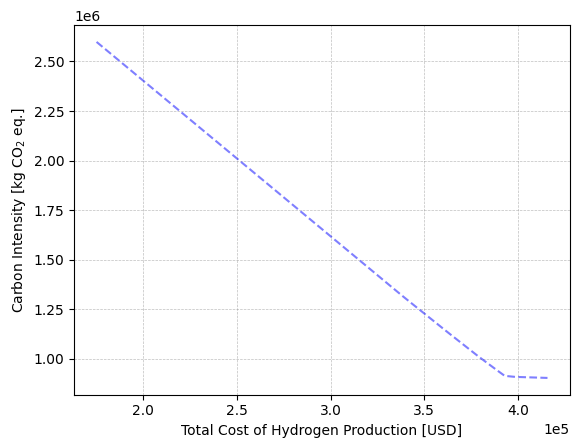

In [47]:
cost = [None for i in range(len(results))]
gwp_study = [None for i in range(len(results))]
gwpm_study = [None for i in range(len(results))]
prod_study = [None for i in range(len(results))]


for gwp_red, result in results.items():

    if result.output['termination'] == 'optimal':
        cost[gwp_red] = result.output['objective']
        gwp_study[gwp_red] = result.output['global_warming_potential_location']['HO', 0]
        gwpm_study[gwp_red] = result.output['global_warming_potential_material']
        prod_study[gwp_red] = result.output['P']

#print(type(gwp_study[0]))

plt.plot(cost, gwp_study, color='blue', linestyle='--', alpha=0.5)

plt.xlabel('Total Cost of Hydrogen Production [USD]')
plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)
# gwp_study[0]

In [48]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Ensure the output directory exists
output_dir = r"C:\Users\marcopdsousa\Desktop\Gif maker 1000"
os.makedirs(output_dir, exist_ok=True)

# Generate time labels
time_labels = [datetime(2025, 1, 1) + timedelta(days=j, hours=i) for j in range(0, 1) for i in range(24)]

fig, ax1 = plt.subplots(figsize=(8, 5))

    # Primary y-axis (Hydrogen Production)
ax1.plot(time_labels, [base['HO', 'SMR', day, hour] for day in range(0, 1) for hour in range(24)], 
             color='blue', label="SMR")
ax1.plot(time_labels, [base['HO', 'SMRCCS', day, hour] for day in range(0, 1) for hour in range(24)], 
             color='red', linestyle='--', label="SMRCCS")

ax1.set_xlabel('Time')
ax1.set_ylabel('Hourly Hydrogen Production [kg]')
ax1.ticklabel_format(style='sci', axis='y')  
ax1.set_ylim(bottom=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.set_xticks(time_labels[::3])
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Secondary y-axis (LiI Energy Storage)
ax2 = ax1.twinx()
ax2.plot(time_labels, [base['HO', 'LiI', day, hour] for day in range(0, 1) for hour in range(24)], 
             color='purple', linestyle=':', label="LiI Storage")

ax2.set_ylabel('Energy Storage [MWh]', color='black')
ax2.set_ylim(0, 40)
ax2.tick_params(axis='y', labelcolor='black')

    # Combine legends from both axes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

    # Save the figure
plt.savefig(os.path.join(output_dir, f"base.png"), dpi=150, bbox_inches='tight')
plt.close()

# print(f"All frames saved successfully in {output_dir}!")

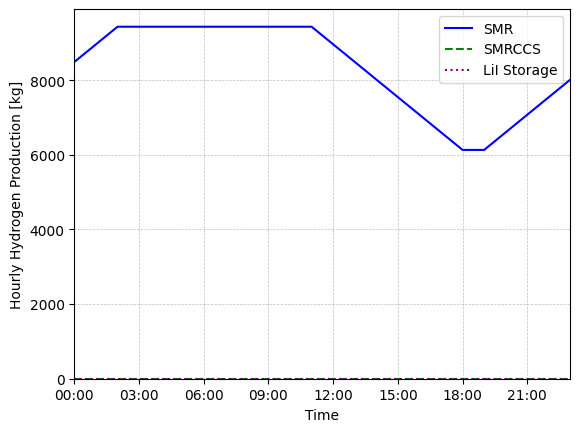

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2025, 1, 1) + timedelta(days=j, hours=i) for j in range(0,1) for i in range(24)]

# Plotting the data
plt.plot(time_labels, [base['HO', 'SMR', day, hour] for day in range(0,1) for hour in range(24)], color='blue', label="SMR")
plt.plot(time_labels, [base['HO', 'SMRCCS', day, hour] for day in range(0,1) for hour in range(24)], color='green', linestyle='--', label="SMRCCS")
plt.plot(time_labels, [base['HO', 'LiI', day, hour] for day in range(0,1) for hour in range(24)], color='purple', linestyle=':', label="LiI Storage")
# plt.plot(time_labels, [prod_study[7]['HO', 'AWE', 0, day, hour] for day in range(0,1) for hour in range(24)], color='purple', linestyle=':', label="AWE")


# Labeling axes
plt.xlabel('Time')
plt.ylabel('Hourly Hydrogen Production [kg]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format %D:%H:%M
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

TypeError: 'NoneType' object is not subscriptable

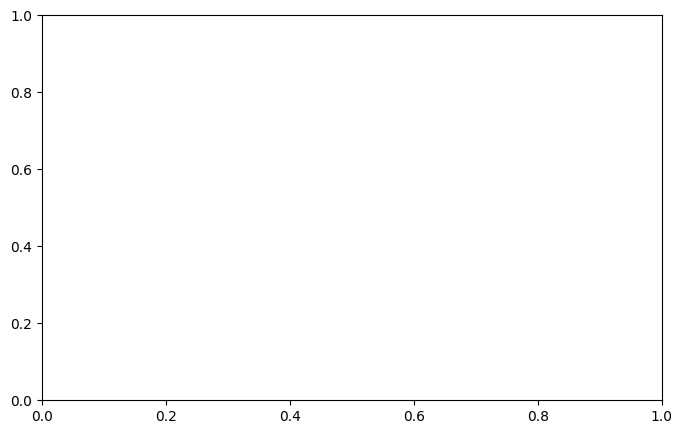

In [50]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Ensure the output directory exists
output_dir = r"C:\Users\marcopdsousa\Desktop\Gif maker 1000"
os.makedirs(output_dir, exist_ok=True)

# Generate time labels
time_labels = [datetime(2025, 1, 1) + timedelta(days=j, hours=i) for j in range(0, 1) for i in range(24)]

for frame in range(340):  # Iterate up to 65
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Primary y-axis (Hydrogen Production)
    ax1.plot(time_labels, [prod_study[frame]['HO', 'SMR', day, hour] for day in range(0, 1) for hour in range(24)], 
             color='blue', label="SMR")
    ax1.plot(time_labels, [prod_study[frame]['HO', 'SMRCCS', day, hour] for day in range(0, 1) for hour in range(24)], 
             color='red', linestyle='--', label="SMRCCS")

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Hourly Hydrogen Production [kg]')
    ax1.ticklabel_format(style='sci', axis='y')  
    ax1.set_ylim(bottom=0)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax1.set_xticks(time_labels[::3])
    ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Secondary y-axis (LiI Energy Storage)
    ax2 = ax1.twinx()
    ax2.plot(time_labels, [prod_study[frame]['HO', 'LiI', day, hour] for day in range(0, 1) for hour in range(24)], 
             color='purple', linestyle=':', label="LiI Storage")

    ax2.set_ylabel('Energy Storage [MWh]', color='black')
    ax2.set_ylim(0, 40)
    ax2.tick_params(axis='y', labelcolor='black')

    # Combine legends from both axes
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    # Save the figure
    plt.savefig(os.path.join(output_dir, f"frame_{frame:03d}.png"), dpi=150, bbox_inches='tight')
    plt.close()

print(f"All frames saved successfully in {output_dir}!")

In [58]:
import os
from PIL import Image

# Define the directory containing the images
image_dir = r"C:\Users\marcopdsousa\Desktop\Gif maker 1000"

# Collect all image paths in sorted order
image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.startswith("frame_") and f.endswith(".png")])

# Define the output GIF path
output_path = os.path.join(image_dir, "my_animation.gif")

def create_gif(image_paths, output_path, duration=100):
    """
    Creates a GIF from a list of image paths.

    Args:
        image_paths (list): A list of file paths to the images.
        output_path (str): The output path for the GIF file.
        duration (int, optional): The duration of each frame in milliseconds. Defaults to 200.
    """
    if not image_paths:
        print("No images found to create GIF.")
        return

    frames = [Image.open(img) for img in image_paths]

    # Save GIF
    frames[0].save(
        output_path,
        save_all=True,
        append_images=frames[1:],
        duration=duration,
        loop=0  # 0 means loop forever
    )

    print(f"GIF saved successfully at: {output_path}")

# Create the GIF
create_gif(image_paths, output_path)

GIF saved successfully at: C:\Users\marcopdsousa\Desktop\Gif maker 1000\my_animation.gif


## Emission Reduction

In [51]:
milp_gwp_65 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.NETWORK, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'geq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_65, network_scale_level = 0, gwp_reduction_pct = 65, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost
constraint global warming potential network reduction


In [52]:
from pyomo.environ import Var, Binary, ConstraintList



milp_gwp_65.cons2 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp_65.cons2.add(expr = milp_gwp_65.P['HO', 'SMR', *i] - milp_gwp_65.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_gwp_65.Cap_P['HO','SMR', i[0]])

# milp_gwp.cons2 = ConstraintList()
# for i in scales.scale_iter(1):
#     if i != (0,0):
#         milp_gwp.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_gwp.Cap_P['HO','SMR', i[0]])

        # milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMR', i[0]])

milp_gwp_65.cons3 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp_65.cons3.add(expr = milp_gwp_65.P['HO', 'SMR', *i] - milp_gwp_65.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*milp_gwp_65.Cap_P['HO','SMR', i[0]])

# # #ramping_limitz = 2000

milp_gwp_65.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp_65.cons4.add(expr = milp_gwp_65.P['HO', 'ATR_CCS_R', *i] - milp_gwp_65.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_gwp_65.Cap_P['HO','ATR_CCS_R', i[0]])

milp_gwp_65.cons5 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp_65.cons5.add(expr = milp_gwp_65.P['HO', 'ATR_CCS_R', *i] - milp_gwp_65.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_gwp_65.Cap_P['HO','ATR_CCS_R', i[0]])


'''right here marco'''
# milp_gwp.cons6 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_gwp.cons6.add(expr = milp_gwp.P['HO', 'ATR_CCS_OC', *i] - milp_gwp.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_gwp.Cap_P['HO','ATR_CCS_OC', i[0]])

# milp_gwp.cons7 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_gwp.cons7.add(expr = milp_gwp.P['HO', 'ATR_CCS_OC', *i] - milp_gwp.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_gwp.Cap_P['HO','ATR_CCS_OC', i[0]])

milp_gwp_65.cons8 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp_65.cons8.add(expr = milp_gwp_65.P['HO', 'ATR_CCS_R_OC', *i] - milp_gwp_65.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_gwp_65.Cap_P['HO','ATR_CCS_R_OC', i[0]])

milp_gwp_65.cons9 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_gwp_65.cons9.add(expr = milp_gwp_65.P['HO', 'ATR_CCS_R_OC', *i] - milp_gwp_65.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_gwp_65.Cap_P['HO','ATR_CCS_R_OC', i[0]])  

#     # Minimum production rate
#     # milp_cost.cons1 = ConstraintList()
#     # for i in scales.scale_iter(1):
#     #  milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

#     # Add binary variables for on/off control
# # milp_cost.on_smr = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for SMR system
# # milp_cost.on_atr_ccs_r = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R system
# # milp_cost.on_atr_ccs_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_OC system
# # milp_cost.on_atr_ccs_r_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R_OC system

milp_gwp_65.cons10 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_gwp_65.cons10.add(expr = milp_gwp_65.P['HO', 'SMR', *i] >= 0.3*milp_gwp_65.Cap_P['HO','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]

milp_gwp_65.cons11 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_gwp_65.cons11.add(expr = milp_gwp_65.P['HO', 'ATR_CCS_R', *i] >= 0.2*milp_gwp_65.Cap_P['HO','ATR_CCS_R', i[0]]) #20% of max production rate
    
# # milp_cost.cons12 = ConstraintList()
# # for i in scales.scale_iter(2):
# #     #if i != (0,0):
# #     milp_cost.cons12.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] >= 0.2*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]]) #20% of max production rate

milp_gwp_65.cons13 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_gwp_65.cons13.add(expr = milp_gwp_65.P['HO', 'ATR_CCS_R_OC', *i] >= 0.2*milp_gwp_65.Cap_P['HO','ATR_CCS_R_OC', i[0]]) #20% of max production rate

    # For SMR
milp_gwp_65.cons14 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_smr == 0)
    milp_gwp_65.cons14.add(expr = milp_gwp_65.P['HO', 'SMR', *i] <=milp_gwp_65.Cap_P['HO','SMR', i[0]])

# For ATR_CCS_R
milp_gwp_65.cons15 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r == 0)
    milp_gwp_65.cons15.add(expr = milp_gwp_65.P['HO', 'ATR_CCS_R', *i] <= milp_gwp_65.Cap_P['HO','ATR_CCS_R', i[0]])

# # # For ATR_CCS_OC
# # milp_cost.cons16 = ConstraintList()
# # for i in scales.scale_iter(2):
# #     #if i != (0, 0):
# #     # Force production to zero if the system is off (on_atr_ccs_oc == 0)
# #     milp_cost.cons16.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] <= milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])

# For ATR_CCS_R_OC
milp_gwp_65.cons17 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r_oc == 0)
    milp_gwp_65.cons17.add(expr = milp_gwp_65.P['HO', 'ATR_CCS_R_OC', *i] <= milp_gwp_65.Cap_P['HO','ATR_CCS_R_OC', i[0]])

In [53]:
results_gwp_65 = solve(scenario=scenario, instance=milp_gwp_65,
                     solver='gurobi', name=f"res_gwp_50", print_solversteps=True, saveformat = '.pkl')

Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Non-default parameters:
QCPDual  1

Optimize a model with 2889 rows, 14645 columns and 7646 nonzeros
Model fingerprint: 0xb1163864
Variable types: 14635 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e-09, 1e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 1e+08]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 2570 rows and 14421 columns
Presolve time: 0.01s
Presolved: 319 rows, 224 columns, 1013 nonzeros
Variable types: 220 continuous, 4 integer (4 binary)

Root relaxation: objective 3.985246e+05, 180 iterations, 0.00 se

In [54]:
results_gwp_65.output['objective']

398524.5644446843

In [69]:
398524.5644446843/200000

1.9926228222234215

In [55]:
results_gwp_65.output['global_warming_potential_location']

{('HO', 0): 909512.786638166}

In [68]:
909512.786638166/200000

4.547563933190831

In [ ]:
results_gwp_65.output['Cap_P']

In [56]:
results_gwp_65.output['P']

{('HO', 'ATR_CCS_R', 0, 0): 0.0,
 ('HO', 'ATR_CCS_R', 0, 1): 0.0,
 ('HO', 'ATR_CCS_R', 0, 2): 0.0,
 ('HO', 'ATR_CCS_R', 0, 3): 0.0,
 ('HO', 'ATR_CCS_R', 0, 4): 0.0,
 ('HO', 'ATR_CCS_R', 0, 5): 0.0,
 ('HO', 'ATR_CCS_R', 0, 6): 0.0,
 ('HO', 'ATR_CCS_R', 0, 7): 0.0,
 ('HO', 'ATR_CCS_R', 0, 8): 0.0,
 ('HO', 'ATR_CCS_R', 0, 9): 0.0,
 ('HO', 'ATR_CCS_R', 0, 10): 0.0,
 ('HO', 'ATR_CCS_R', 0, 11): 0.0,
 ('HO', 'ATR_CCS_R', 0, 12): 0.0,
 ('HO', 'ATR_CCS_R', 0, 13): 0.0,
 ('HO', 'ATR_CCS_R', 0, 14): 0.0,
 ('HO', 'ATR_CCS_R', 0, 15): 0.0,
 ('HO', 'ATR_CCS_R', 0, 16): 0.0,
 ('HO', 'ATR_CCS_R', 0, 17): 0.0,
 ('HO', 'ATR_CCS_R', 0, 18): 0.0,
 ('HO', 'ATR_CCS_R', 0, 19): 0.0,
 ('HO', 'ATR_CCS_R', 0, 20): 0.0,
 ('HO', 'ATR_CCS_R', 0, 21): 0.0,
 ('HO', 'ATR_CCS_R', 0, 22): 0.0,
 ('HO', 'ATR_CCS_R', 0, 23): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 0): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 1): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 2): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 3): 0.0,
 ('HO', 'ATR_CCS_R_OC', 0, 4): 0.0,
 ('HO', 'ATR_C

In [59]:
z = results_gwp_65.output['P']

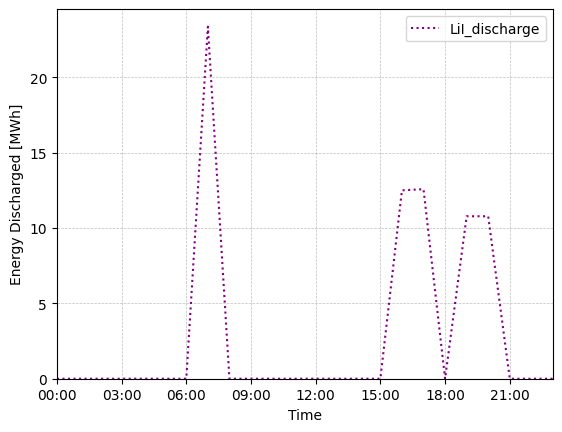

In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2025, 1, 1) + timedelta(days=j, hours=i) for j in range(0,1) for i in range(24)]

# Plotting the data
plt.plot(time_labels, [z['HO', 'LiI_discharge', day, hour] for day in range(0,1) for hour in range(24)], color='purple', linestyle=':', label="LiI_discharge")
# plt.plot(time_labels, [prod_study[7]['HO', 'AWE', 0, day, hour] for day in range(0,1) for hour in range(24)], color='purple', linestyle=':', label="AWE")


# Labeling axes
plt.xlabel('Time')
plt.ylabel('Energy Discharged [MWh]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format %D:%H:%M
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
2601506/200000

In [ ]:
901991/200000

In [ ]:
910527/200000

In [ ]:
4.51/13

In [ ]:
4.55/13

In [ ]:
# plot_results.schedule(results = results_cost, y_axis= 'P', component = 'Grid', location='HO')

In [ ]:
from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction

In [ ]:
from pyomo.environ import Var, Binary



    # milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMR', i[0]])

# #ramping_limitz = 2000


# milp_cost.cons6 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_cost.cons6.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] - milp_cost.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])

# milp_cost.cons7 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_cost.cons7.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] - milp_cost.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])        


# Minimum production rate
# milp_cost.cons1 = ConstraintList()
# for i in scales.scale_iter(1):
#  milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

# Add binary variables for on/off control
# milp_cost.on_smr = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for SMR system
# milp_cost.on_atr_ccs_r = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R system
# milp_cost.on_atr_ccs_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_OC system
# milp_cost.on_atr_ccs_r_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R_OC system




#if i != (0,0):

# milp_cost.cons12 = ConstraintList()
# for i in scales.scale_iter(2):
#     #if i != (0,0):
#     milp_cost.cons12.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] >= 0.2*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]]) #20% of max production rate

#if i != (0,0):

# For SMR

#if i != (0, 0):
# Force production to zero if the system is off (on_smr == 0)

# For ATR_CCS_R


#if i != (0, 0):
# Force production to zero if the system is off (on_atr_ccs_r == 0)

# # For ATR_CCS_OC
# milp_cost.cons16 = ConstraintList()
# for i in scales.scale_iter(2):
#     #if i != (0, 0):
#     # Force production to zero if the system is off (on_atr_ccs_oc == 0)
#     milp_cost.cons16.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] <= milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])

# For ATR_CCS_R_OC

#if i != (0, 0):
# Force production to zero if the system is off (on_atr_ccs_r_oc == 0)

def modeler(gwp_pct: float):
    gwp_eval = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION, Constraints.NETWORK,
                        Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION, Constraints.MATERIAL}, objective=Objective.COST, demand_sign = 'geq')
    gwp_eval.cons2 = ConstraintList()
    gwp_eval.cons3 = ConstraintList()
    gwp_eval.cons4 = ConstraintList()
    gwp_eval.cons5 = ConstraintList()
    gwp_eval.cons8 = ConstraintList()
    gwp_eval.cons9 = ConstraintList()
    gwp_eval.cons10 = ConstraintList()
    gwp_eval.cons11 = ConstraintList()
    gwp_eval.cons13 = ConstraintList()
    gwp_eval.cons14 = ConstraintList()
    gwp_eval.cons15 = ConstraintList()
    gwp_eval.cons17 = ConstraintList()

    for i in scales.scale_iter(2):
        gwp_eval.cons10.add(expr = gwp_eval.P['HO', 'SMR', *i] >= 0.3*gwp_eval.Cap_P['HO','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]
        gwp_eval.cons11.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] >= 0.2*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]]) #20% of max production rate
        gwp_eval.cons13.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] >= 0.2*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]]) #20% of max production rate
        gwp_eval.cons14.add(expr = gwp_eval.P['HO', 'SMR', *i] <=gwp_eval.Cap_P['HO','SMR', i[0]])
        gwp_eval.cons15.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] <= gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
        gwp_eval.cons17.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] <= gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])
        if i != (0,0,0):
            gwp_eval.cons2.add(expr = gwp_eval.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
            gwp_eval.cons3.add(expr = gwp_eval.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
            gwp_eval.cons4.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] - gwp_eval.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
            gwp_eval.cons5.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] - gwp_eval.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
            gwp_eval.cons8.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] - gwp_eval.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])
            gwp_eval.cons9.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] - gwp_eval.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])


    constraint_global_warming_potential_network_reduction(instance= gwp_eval, network_scale_level = 0, gwp_reduction_pct = gwp_pct, gwp = results_cost.output['global_warming_potential_network'][0])
    
    return gwp_eval

In [ ]:
models = [modeler((i+1)*10) for i in range(10)]

In [ ]:
# def solver(instance, i): 
#     return solve(scenario=scenario, instance=instance,
#                      solver='gurobi', name=f"res_red/res_red_{i}", print_solversteps=True, saveformat = '.pkl')

In [ ]:
import os

# Create the 'res_red' directory if it doesn't exist
os.makedirs('res_red', exist_ok=True)

def solver(instance, i): 
    return solve(
        scenario=scenario, 
        instance=instance,
        solver='gurobi', 
        name=f"res_red/res_red_{i}", 
        print_solversteps=True, 
        saveformat='.pkl'
    )

# Assuming 'models' is a list of instances to be solved
results = {i: solver(m, i) for i, m in enumerate(models)}


In [ ]:
# results = {i: solver(m,i) for i,m in enumerate(models)}

In [ ]:
for i in range(len(models)):
    print(results[i].output['termination'])

In [ ]:
cost = [None for i in range(len(results))]
gwp_study = [None for i in range(len(results))]
gwpm_study = [None for i in range(len(results))]
prod_study = [None for i in range(len(results))]


for gwp_red, result in results.items():

    if result.output['termination'] == 'optimal':
        cost[gwp_red] = result.output['objective']
        gwp_study[gwp_red] = result.output['global_warming_potential_location']['HO', 0]
        gwpm_study[gwp_red] = result.output['global_warming_potential_material']
        prod_study[gwp_red] = result.output['P']

#print(type(gwp_study[0]))

plt.plot(cost, gwp_study, color='blue', linestyle='--', alpha=0.5)

plt.xlabel('Total Cost of Hydrogen Production [USD]')
plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)
# gwp_study[0]

In [ ]:
196095904.32489505/(200000*365)

In [ ]:
304555211.5247123/(200000*365)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(174,175) for i in range(24)]

# Plotting the data
plt.plot(time_labels, [prod_study[7]['HO', 'SMRCCS', 0, day, hour] for day in range(174,175) for hour in range(24)], color='blue', label="SMRCCS")
plt.plot(time_labels, [prod_study[7]['HO', 'PEM', 0, day, hour] for day in range(174,175) for hour in range(24)], color='green', linestyle='--', label="PEM")
plt.plot(time_labels, [prod_study[7]['HO', 'AWE', 0, day, hour] for day in range(174,175) for hour in range(24)], color='purple', linestyle=':', label="AWE")


# Labeling axes
plt.xlabel('Time')
plt.ylabel('Hourly Hydrogen Production [kg]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format %D:%H:%M
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
200000*365


10% Reduction scenario

In [ ]:
import pickle
data = [pickle.load(open(f'res_red/res_red_{i}.pkl','rb')) for i in range(9)]

In [ ]:
gwp = [data[i]['output']['global_warming_potential_network'] for i in range(8)]
cost = [data[i]['output']['objective'] for i in range(8)]

In [ ]:
test = pickle.load(open(f'res_red/res_red_6.pkl','rb'))

In [ ]:
test['output']['global_warming_potential_material']

In [ ]:
test['output']['objective']

In [ ]:
test['output']['global_warming_potential_material']

In [ ]:
2994.1382395718174+1632.9517222916115+156.7113953925191+4082880.111588101 + 244288572.0237259 #Scope 3 Emissions

In [ ]:
248376235.93667126+70094.88867814424+33693166.4467999

In [ ]:
a = {i:j for i,j in test['output']['global_warming_potential_resource_consumption'].items() if i[1] == 'GridPower'}

In [ ]:
b = {i:j for i,j in test['output']['global_warming_potential_resource_discharge'].items() if i[1] == 'CO2 to Stack' }

In [ ]:
c = {i:j for i,j in test['output']['global_warming_potential_resource_discharge'].items() if i[1] == 'CO2 Vented from the process' }

In [ ]:
ng = {i:j for i,j in test['output']['global_warming_potential_resource_consumption'].items() if i[1] == 'Natural Gas'}

In [ ]:
4125580.7165999995+1704.0333747974853+136.77303096392424+4082880.111588101+247998694.47225738

In [ ]:
90267378.53178616 + 29691559.235019855

In [ ]:
sum(list(a.values()))

In [ ]:
sum(list(b.values()))

In [ ]:
sum(list(ng.values()))

In [ ]:
sum(list(c.values()))

60% Reduction scenario

In [ ]:
18062.49+90267378.53178616+247998694.47225738+29691559.235019855+4125580.7165999995+1704.0333747974853+136.77303096392424+4082880.111588101

70% Reduction Scenario

In [ ]:
29691559.235019855+247998694.47225738+90267378.5317861+18062.4891893805+4125580.7165999995+4082880.111588101+1704.0333747974853+136.77303096392424

In [ ]:
test['output']['Cap_P']

In [ ]:
# plt.plot(list(b.values()))

In [ ]:
# plt.plot(list(a.values()))

In [ ]:
#Material emissions Scope 3
18062.49+8210301.63+247998694.4+90267378.53+29671559.235


In [ ]:
test['output']['global_warming_potential_location']

In [ ]:
test['output']['Cap_P']

In [ ]:
test['output']['objective']

In [ ]:
cost

In [ ]:
gwp

In [ ]:
# plt.plot(gwp, cost, color='blue', linestyle='--', alpha=0.5)

# plt.xlabel('Total Cost of Hydrogen Production [USD]')
# plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)

In [ ]:
cost = [None for i in range(len(results))]
gwp_study = [None for i in range(len(results))]
prod_study = [None for i in range(len(results))]


for gwp_red, result in results.items():

    if result.output['termination'] == 'optimal':
        cost[gwp_red] = result.output['objective']
        gwp_study[gwp_red] = result.output['global_warming_potential_location']['HO', 0]
        prod_study[gwp_red] = result.output['P']

print(type(gwp_study[0]))

plt.plot(gwp_study, cost, color='blue', linestyle='--', alpha=0.5)

plt.xlabel('Total Cost of Hydrogen Production [USD]')
plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)
# gwp_study[0]

Additional call out for results gathering

In [ ]:
results_cost.output['X_P']

In [ ]:
results_cost.output['P_location'][('HO', 'AWE', 0)]/results_cost.output['P_location'][('HO', 'PEM', 0)] 

In [ ]:
results_cost.output['Capex_process'][('HO', 'AWE', 0)]/results_cost.output['Capex_process'][('HO', 'PEM', 0)] 

In [ ]:
results_cost.output['Capex_process'][('HO', 'AWE', 0)]/results_cost.output['P_location'][('HO', 'AWE', 0)]

In [ ]:
results_cost.output['Capex_process'][('HO', 'PEM', 0)]/results_cost.output['P_location'][('HO', 'PEM', 0)]

In [ ]:
results_cost.output['global_warming_potential_location']

In [ ]:
prod_study = results_cost.output['P']

In [ ]:
prod_study['HO','Grid',0,0,8]

In [ ]:
# results_cost.output['P']

In [ ]:
results_cost.output['Cap_P']